<a href="https://colab.research.google.com/github/jmlucasusc4/LinearRegressionProject/blob/main/Seoul_Bike_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the libraries**



In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading Data File**

In [36]:
data= pd.read_csv('/content/SeoulBikeData.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [37]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [38]:
data.shape

(8760, 14)

**Checking for Missing Values**

In [39]:
Missing_values= data.isna().sum()
Missing_values

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [40]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Plot the Correlation**

In [41]:
data_cor=data.corr()
data_cor

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


**HeatMap Correlation**

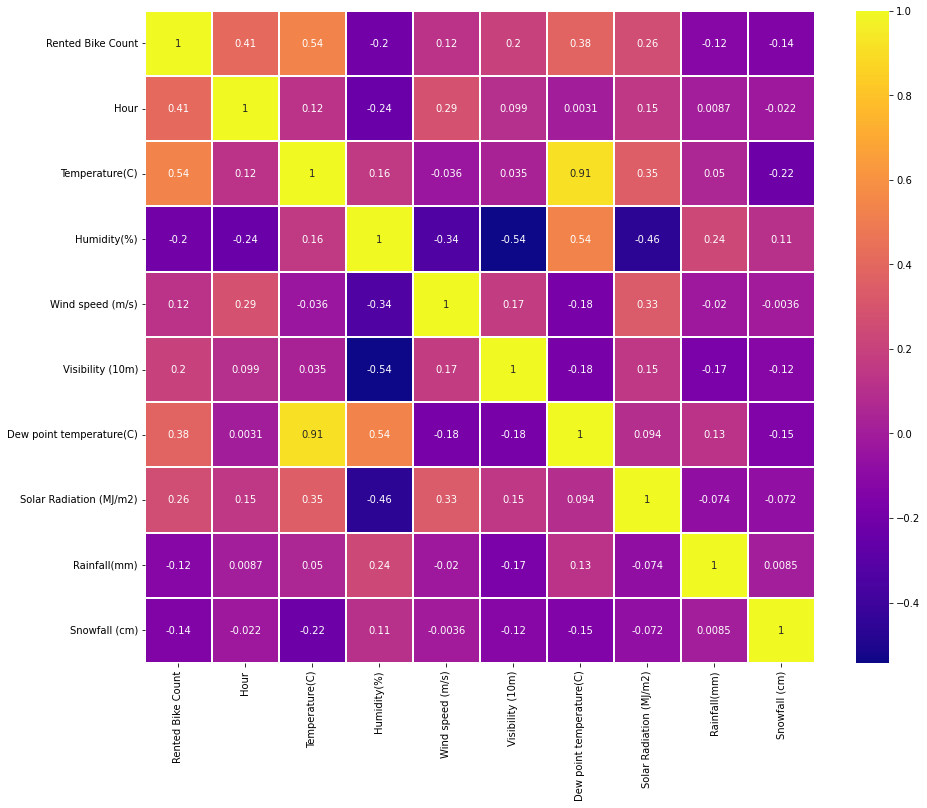

In [42]:
plt.figure(figsize=(15,12))
sns.heatmap(data_cor,annot=True,linewidths=1.0,cmap=('plasma'))
plt.show()

**Checking for Outliers**

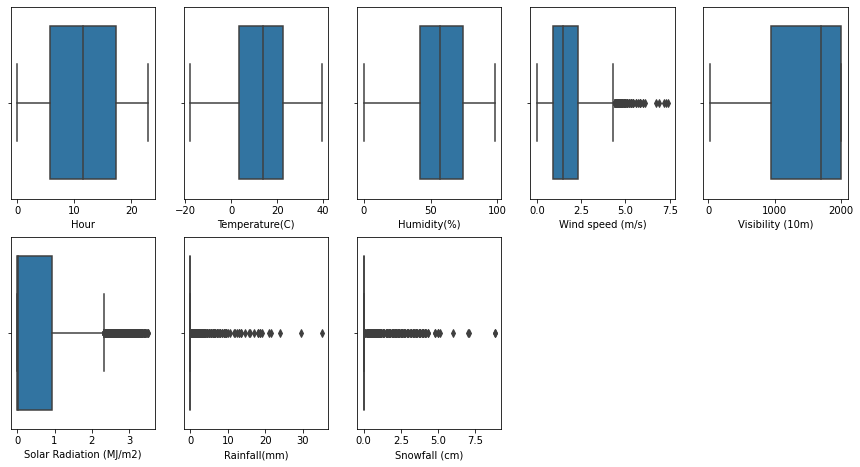

In [43]:
plt.figure(figsize=(15,12))
plt.subplot(3,5,1)
sns.boxplot(x=data['Hour'])
plt.subplot(3,5,2)
sns.boxplot(x=data['Temperature(C)'])
plt.subplot(3,5,3)
sns.boxplot(x=data['Humidity(%)'])
plt.subplot(3,5,4)
sns.boxplot(x=data['Wind speed (m/s)'])
plt.subplot(3,5,5)
sns.boxplot(x=data['Visibility (10m)'])
plt.subplot(3,5,6)
sns.boxplot(x=data['Solar Radiation (MJ/m2)'])
plt.subplot(3,5,7)
sns.boxplot(x=data['Rainfall(mm)'])
plt.subplot(3,5,8)
sns.boxplot(x=data['Snowfall (cm)'])


In [44]:
data= data.drop(['Dew point temperature(C)'],axis=1)



In [45]:
data

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes


**Preparing Data for Modeling**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [47]:
data['Date']=pd.to_datetime(data['Date'],format="%d/%m/%Y")

In [48]:
data

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [49]:
data['Label_day_night']=data['Hour'].apply(lambda x:0 if (x>20 or x<5) else (1))

In [50]:
data['Weekday']=data['Date'].dt.day_name()
data['Month']=data['Date'].dt.month

In [51]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Label_day_night,Weekday,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,Friday,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,Friday,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,Friday,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,Friday,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,Friday,12


In [52]:
x= data.drop(['Date','Seasons','Holiday','Functioning Day','Weekday','Rented Bike Count'],axis=1)
y=data.iloc[:,1]

In [53]:
x.head()


,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Label_day_night,Month
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,12
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,12
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,12
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,12
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,12


In [54]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

**Spliting Data to Train and Test**

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

**Training the Model**

In [56]:
linear_regression_model=linear_model.LinearRegression()
model=linear_regression_model.fit(x_train,y_train)

**Testing Model**

In [57]:
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

**Checking Accuracy using R2 Score**

In [58]:
train_set_r2 = r2_score(y_train, pred_train)
print('Linear model, R2 train score is : {}'.format(train_set_r2))
test_set_r2 = r2_score(y_test, pred_test)
print('Linear model, R2 test score is : {}'.format(test_set_r2))

Linear model, R2 train score is : 0.47772689255547396
Linear model, R2 test score is : 0.47735660080285913


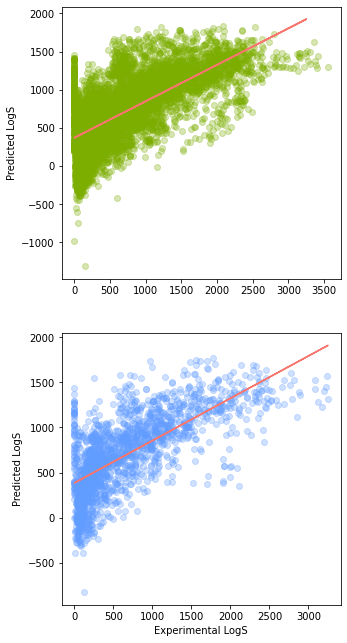

In [59]:
# Scatter plot of experimental vs. predicted Logs
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,11))
plt.subplot(2,1,1)
plt.scatter(x=y_train,y=pred_train, c='#7CAE00',alpha=0.3)
z=np.polyfit(y_train,pred_train,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),'#F8766D')
plt.ylabel('Predicted Logs')

z = np.polyfit(y_train, pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted LogS')

plt.subplot(2, 1, 2)
plt.scatter(x=y_test, y=pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.show()

## R2 score is 1.0 indicating that model has 47% accuracy. 